# Sheet 5: Moran $I$ Analysis of model

Moran's $I$ measures spatial autocorrelation.

\begin{equation}
I = \frac{N}{W} \frac{\sum_{ij} \omega_{ij} (s_i - \bar{s})(s_j - \bar{s})}{\sum_i (s_i - \bar{s})^2}
\end{equation}

Here the $\omega_{ij} = 1$ are spatial weights. We set $\omega_{ij}=1$ if $j$ is one of the $k$ nearest neighbours of $i$. $N$ = number of points, and $W = \sum_{i,j} \omega_{ij}$. Using this definition $I$ measures how likeley nearby sites are to match. 


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
import time
from multiprocessing import Process, Manager, Pool
import copy
import importlib

import binary_hopfield as sim
import Ising_Model as im
import SED_utility as util

from pathlib import Path

this_folder = Path.cwd()
sed_data_folder = Path(Path.cwd()/'SED_DATA')
plots_folder = Path(Path.cwd()/'PLOTS')
results_folder = Path(Path.cwd()/'CALIB_RESULTS')


# map_folder = Path('C:/Users/djb/Dropbox/RESEARCH/APEX/SED/DATA/MAP_DATA')
# bin_hop_folder = Path('C:/Users/djb/Dropbox/RESEARCH/APEX/SED/PYTHON_BINARY_HOPFIELD/GITHUB_CODE')
# sed_data_folder = \
# Path('C:/Users/djb/Dropbox/RESEARCH/APEX/SED/PYTHON_BINARY_HOPFIELD/SED_DATA/DATA_30_03_20')
# #Path('C:/Users/djb/Dropbox/RESEARCH/APEX/SED/PYTHON_BINARY_HOPFIELD/SED_DATA')

# plots_folder = Path('C:/Users/djb/Dropbox/RESEARCH/APEX/SED/PYTHON_BINARY_HOPFIELD/GITHUB_CODE/PLOTS')
# sample_folder = Path('C:/Users/djb/Dropbox/RESEARCH/APEX/SED/PYTHON_BINARY_HOPFIELD/GITHUB_CODE/SAMPLES')

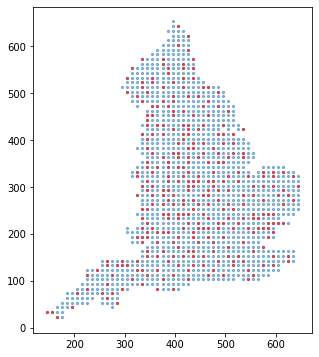

In [2]:
importlib.reload(util)
XB,XUK,survey_nodes = util.load_maps(this_folder)
XUK = XUK/1000
XB = XB/1000
XS = XUK[survey_nodes]
dmat_SED = distance_matrix(XS,XS)
all_nodes = np.arange(0,len(XUK))
plt.figure(figsize=(5,6))
plt.scatter(XUK[:,0],XUK[:,1],alpha=0.5,s=5)
plt.scatter(XS[:,0],XS[:,1],alpha=0.5,s=5,c='r')
plt.show()

In [3]:
importlib.reload(util)
num_nbrs = 6
AI = util.make_Adj(XS,num_nbrs)

## Basic Neutral args

In [4]:
importlib.reload(sim)
importlib.reload(util)

power=1.5
n=100
T=20000
neutral_sample_times = util.generate_sample_times(T,power,n)
print(neutral_sample_times)

#Determine adjacencies and set up symmetric K matrix
dmat = distance_matrix(XUK,XUK)
Adj = np.array(dmat<10.1,dtype=int)

#************************************
#Set up dictionary of parameters
args={}
args['model']='Neutral'
args['sample_times']=neutral_sample_times
args['cell_pop']  =10000

args['alpha'] = None
args['Adj'] = Adj
args['K'] = None # sim.make_K(args['alpha'],Adj)


args['survey_nodes'] = survey_nodes

args['q'] = 2
args['tau']= 2.0
args['beta']= 3.0
args['steps']= 100
args['trials']=50
args['plot']=False

[    1    21    58   106   163   228   299   377   460   549   643   741
   845   952  1064  1180  1300  1424  1551  1682  1817  1954  2096  2240
  2388  2538  2692  2849  3009  3171  3337  3505  3676  3850  4026  4205
  4386  4570  4757  4946  5137  5331  5527  5726  5926  6130  6335  6543
  6753  6965  7179  7395  7614  7835  8057  8282  8509  8738  8969  9202
  9437  9674  9913 10153 10396 10641 10887 11135 11386 11638 11892 12147
 12405 12664 12925 13188 13453 13719 13987 14257 14529 14802 15077 15354
 15632 15912 16193 16477 16762 17048 17336 17626 17917 18210 18505 18801
 19098 19398 19698 20000]


In [5]:
importlib.reload(util)
alpha0=0.05
Ns = [50,10,5]
args_list = [util.make_args(args,alpha0,N) for N in Ns]

sigma =  3.1622776601683795
sigma_adj =  0.223606797749979
sigma =  3.1622776601683795
sigma_adj =  0.1
sigma =  3.1622776601683795
sigma_adj =  0.07071067811865475


In [6]:
print(util.sigma_equiv(0.125,10))
print(util.sigma_equiv(0.05,10))


5.0
3.1622776601683795


## Generate Moran $I$ sequences for the neutral case

In [7]:
importlib.reload(util)
trials=10
neut_I_seqs50 = util.generate_moran_seqs(trials,args_list[0],AI)
neut_I_seqs10 = util.generate_moran_seqs(trials,args_list[1],AI)
neut_I_seqs5 = util.generate_moran_seqs(trials,args_list[2],AI)

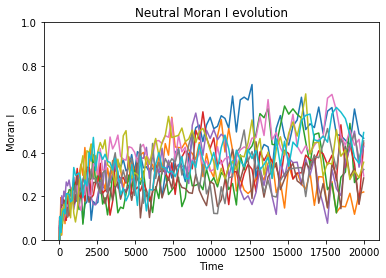

In [8]:
for Is in neut_I_seqs5:
    plt.plot(args['sample_times'],Is)
plt.xlabel('Time')
plt.ylabel('Moran I')
plt.ylim(0,1)
plt.title('Neutral Moran I evolution')
plt.show()

### Generate Moran I sequences for the Potts case

In [9]:
importlib.reload(util)
importlib.reload(sim)
#Set up args for potts simulation
TP=1500
powerP=1.5
nP =50
potts_args = copy.copy(args)
potts_args['model']='Potts'
potts_args['alpha']=0.125
potts_args['K']=sim.make_K(potts_args['alpha'],potts_args['Adj'])
potts_args['sample_times'] = util.generate_sample_times(TP,powerP,nP)
print(potts_args['sample_times'])

trials=40

potts_args['beta']=2.5
potts_I_seqs1 = util.generate_moran_seqs(trials,potts_args,AI)

potts_args['beta']=3.0
potts_I_seqs2 = util.generate_moran_seqs(trials,potts_args,AI)

potts_args['beta']=3.5
potts_I_seqs3 = util.generate_moran_seqs(trials,potts_args,AI)


[   1    5   13   23   35   49   65   81   99  119  139  160  182  205
  230  255  280  307  334  363  392  421  452  483  515  547  580  614
  648  683  719  755  792  830  867  906  945  985 1025 1066 1107 1149
 1191 1234 1277 1321 1365 1410 1455 1500]


### Examine evolution of Potts case as sanity check

0 1


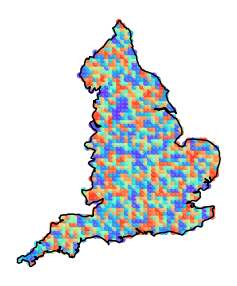

1 5


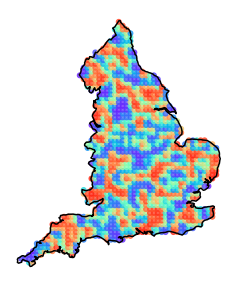

2 13


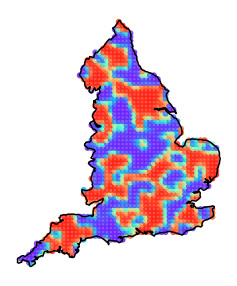

3 23


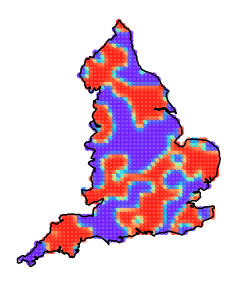

4 35


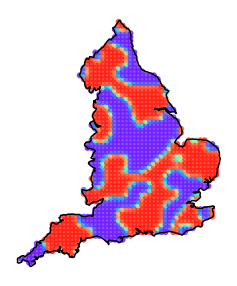

5 49


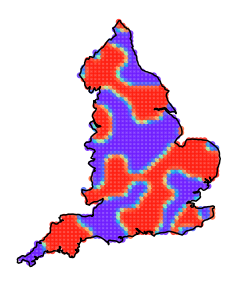

6 65


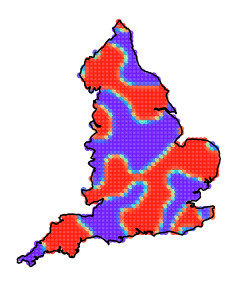

7 81


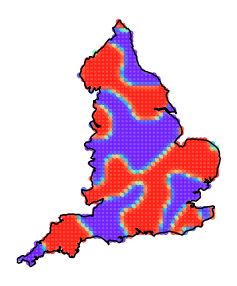

8 99


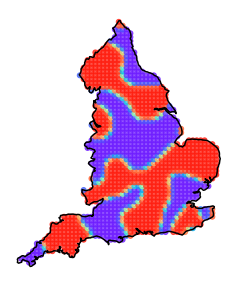

9 119


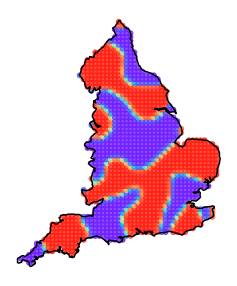

10 139


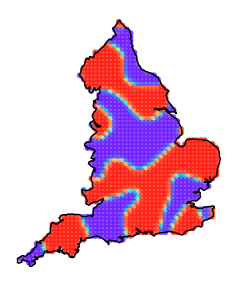

11 160


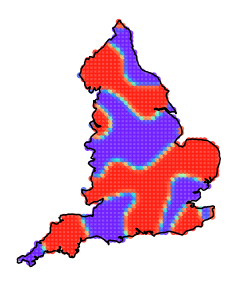

12 182


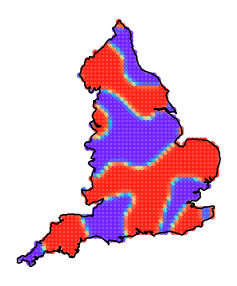

13 205


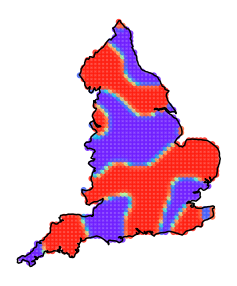

14 230


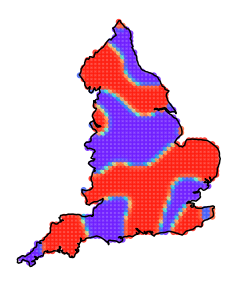

15 255


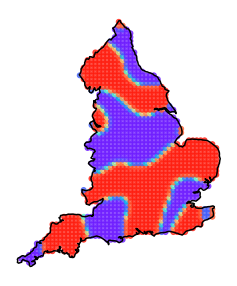

16 280


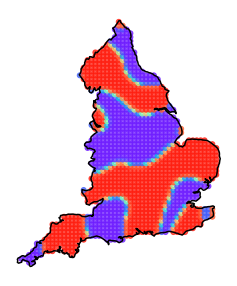

17 307


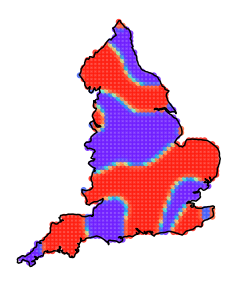

18 334


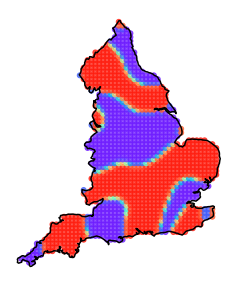

19 363


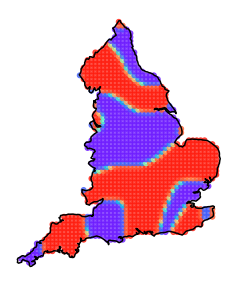

20 392


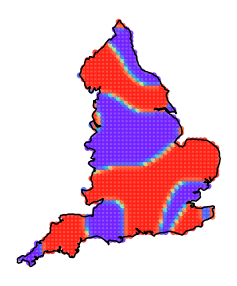

21 421


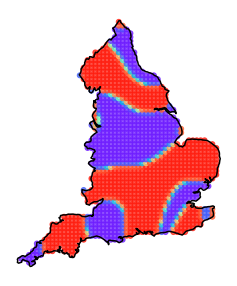

22 452


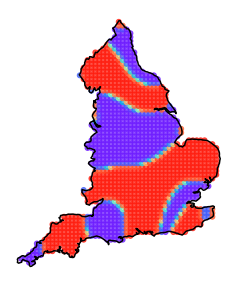

23 483


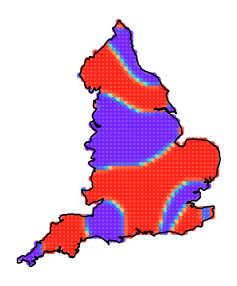

24 515


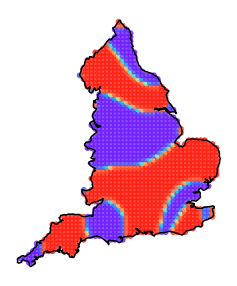

25 547


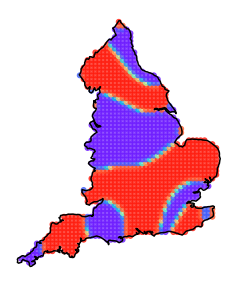

26 580


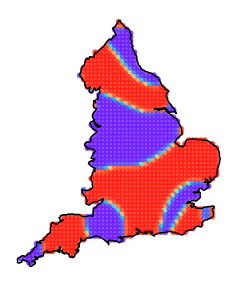

27 614


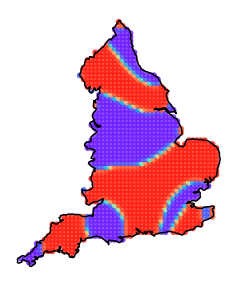

28 648


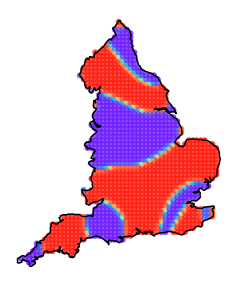

29 683


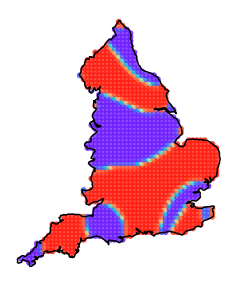

30 719


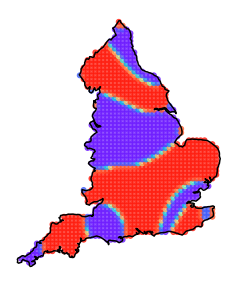

31 755


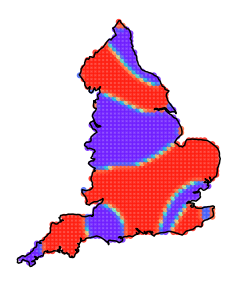

32 792


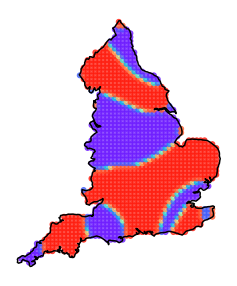

33 830


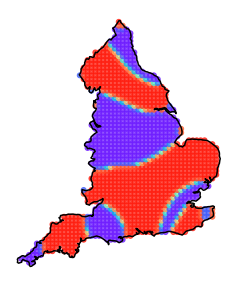

34 867


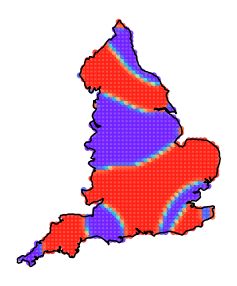

35 906


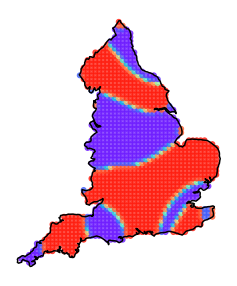

36 945


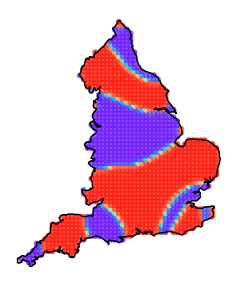

37 985


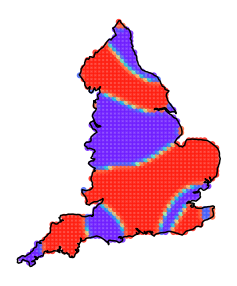

38 1025


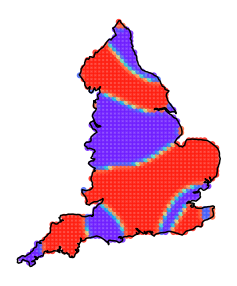

39 1066


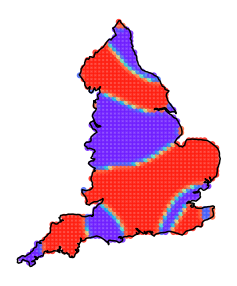

40 1107


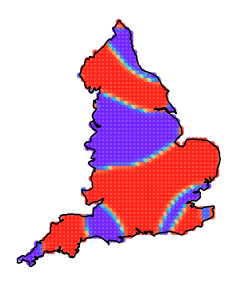

41 1149


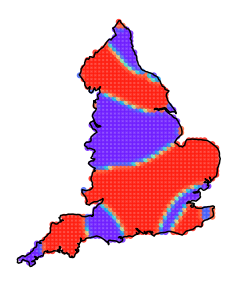

42 1191


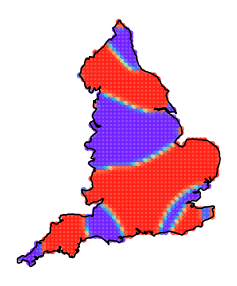

43 1234


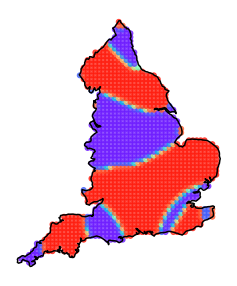

44 1277


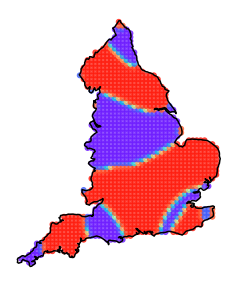

45 1321


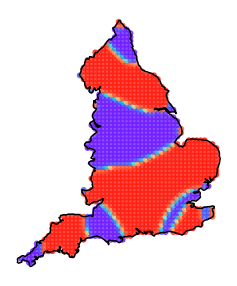

46 1365


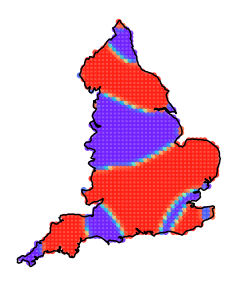

47 1410


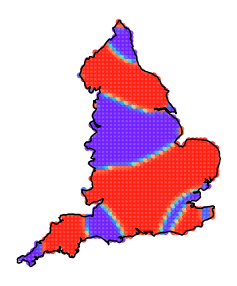

48 1455


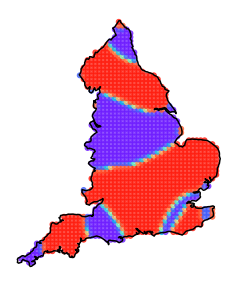

49 1500


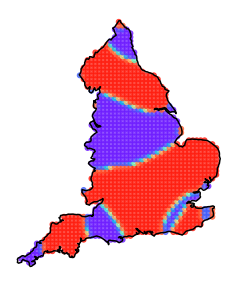

In [10]:
importlib.reload(sim)
potts_samples, potts_states  = sim.sample_sequence(potts_args)

k=0
for sample,T in zip(potts_states,potts_args['sample_times']):
    print(k,T)
    k +=1
    sim.plot_sample(sample,XUK,all_nodes,XB,dims=(4,5),sz=25)

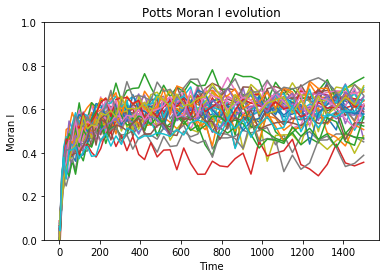

In [11]:
for Is in potts_I_seqs3:
    plt.plot(potts_args['sample_times'],Is)
plt.xlabel('Time')
plt.ylabel('Moran I')
plt.ylim(0,1)
plt.title('Potts Moran I evolution')
plt.show()

### Generate combined histogram plots of Moran $I$ values for the neutral and non-neutral cases

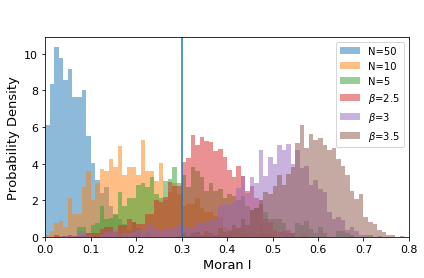

In [12]:
nbins = np.arange(0,1,0.01)

neut_stable_Is1 = (neut_I_seqs50.T)[5:].ravel()
neut_stable_Is2 = (neut_I_seqs10.T)[5:].ravel()
neut_stable_Is3 = (neut_I_seqs5.T)[5:].ravel()

plt.hist(neut_stable_Is1[neut_stable_Is1>0],density=True,alpha=0.5,bins=nbins)
plt.hist(neut_stable_Is2[neut_stable_Is2>0],density=True,alpha=0.5,bins=nbins)
plt.hist(neut_stable_Is3[neut_stable_Is3>0],density=True,alpha=0.5,bins=nbins)


#Change this to false if you only want to see neutral I distributions
if True:
    potts_stable_Is1 = (potts_I_seqs1.T)[10:].ravel()
    potts_stable_Is2 = (potts_I_seqs2.T)[10:].ravel()
    potts_stable_Is3 = (potts_I_seqs3.T)[10:].ravel()

    plt.hist(potts_stable_Is1,density=True,alpha=0.5,bins=nbins)
    plt.hist(potts_stable_Is2,density=True,alpha=0.5,bins=nbins)
    plt.hist(potts_stable_Is3,density=True,alpha=0.5,bins=nbins)

plt.tick_params(labelsize=11)
plt.xlabel('Moran I',size=13)
plt.ylabel('Probability Density',size=13)
plt.xlim(0,0.8)

plt.legend(['N=50','N=10','N=5',r'$\beta$=2.5',r'$\beta$=3',r'$\beta$=3.5'])


plt.annotate('Non-neutral',(0.4,12),**{'fontsize': 14})
plt.annotate('Neutral',(0.09,12),**{'fontsize': 14})
plt.axvline(0.3)


plt.tight_layout()
plt.savefig(plots_folder/'I_dists_sim.pdf')
plt.show()

# Make detailed state maps for the neutral case

In [13]:
importlib.reload(sim)
test_args = copy.copy(args_list[2])
neutral_samples, neutral_states  = sim.sample_sequence(test_args)

0 T =  1


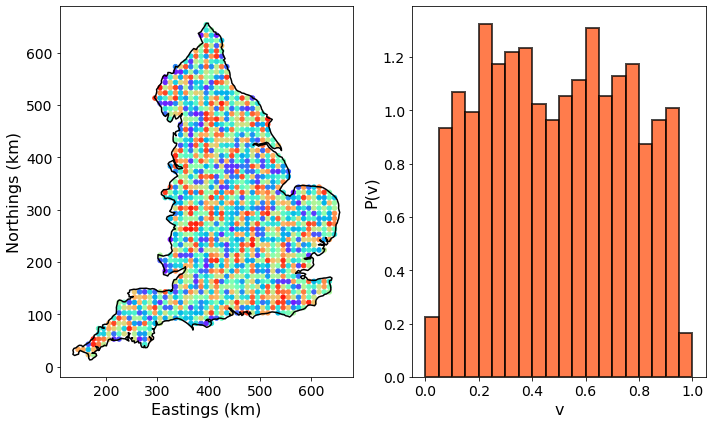

10 T =  643


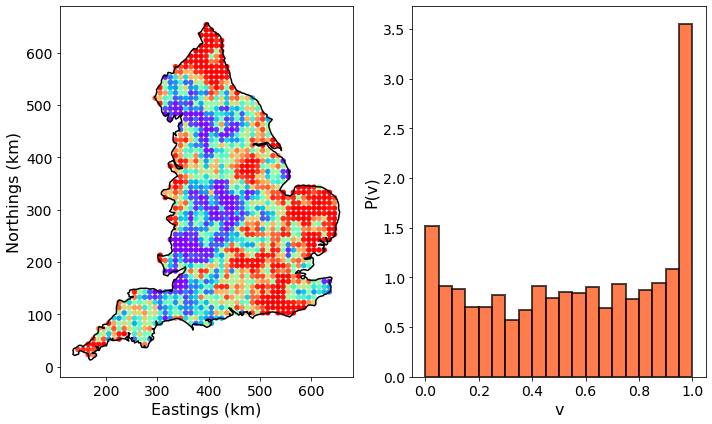

20 T =  1817


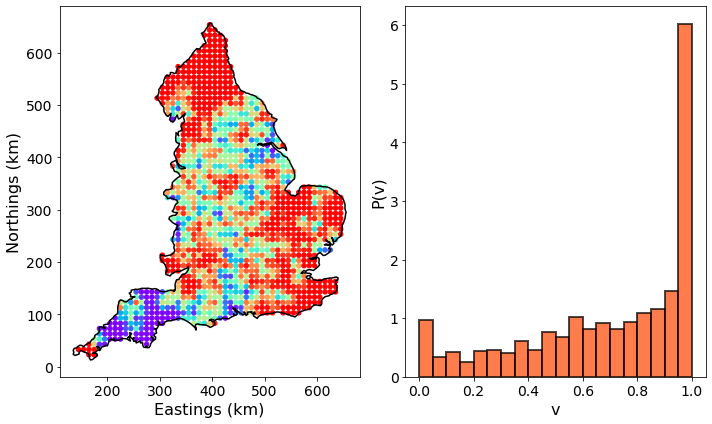

30 T =  3337


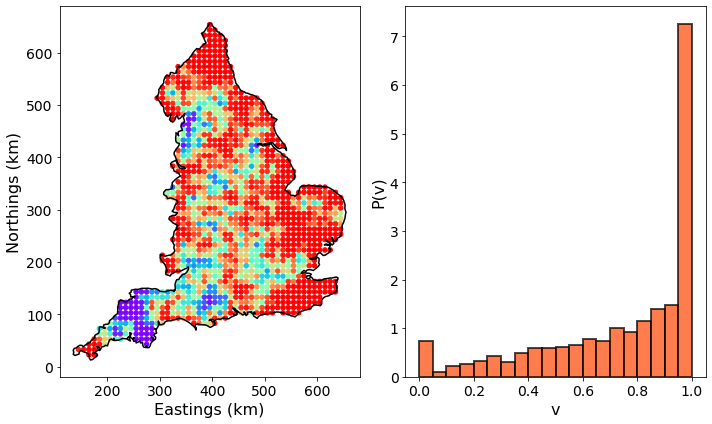

40 T =  5137


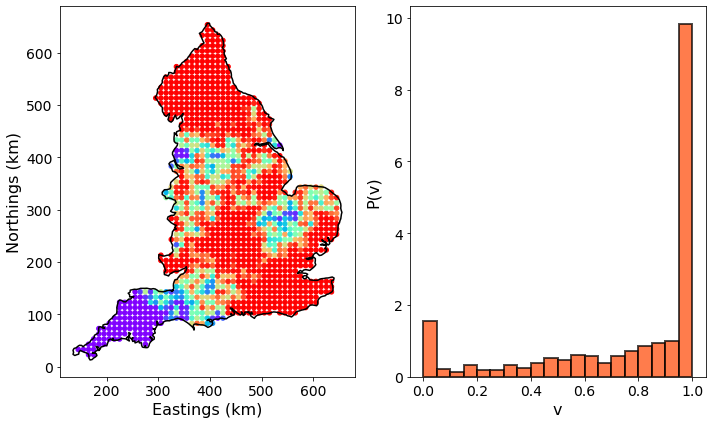

50 T =  7179


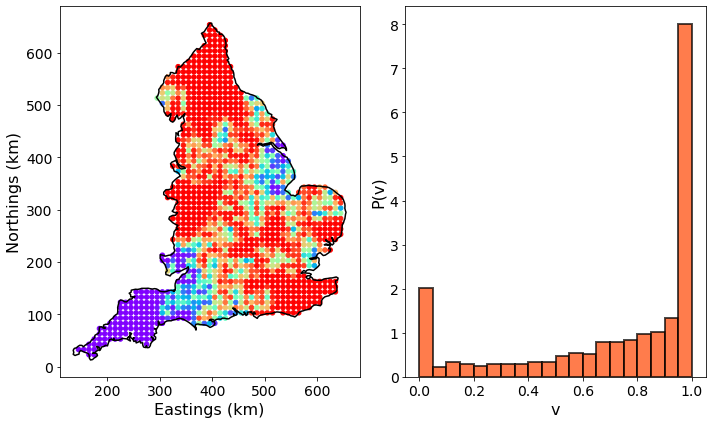

60 T =  9437


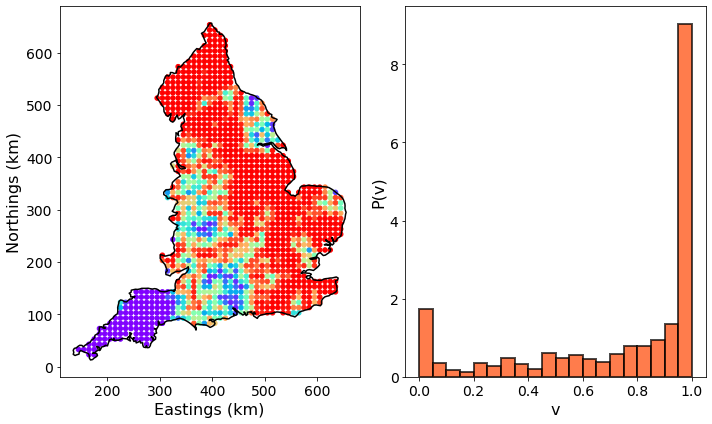

70 T =  11892


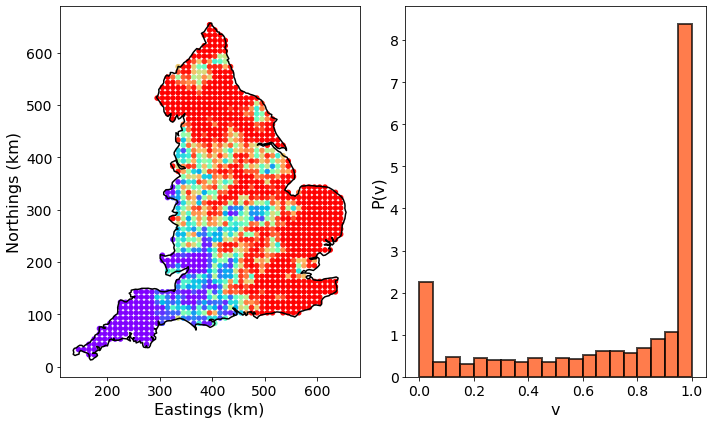

80 T =  14529


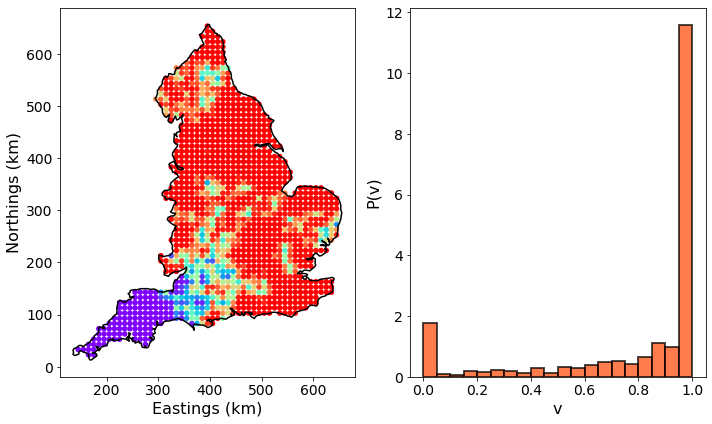

90 T =  17336


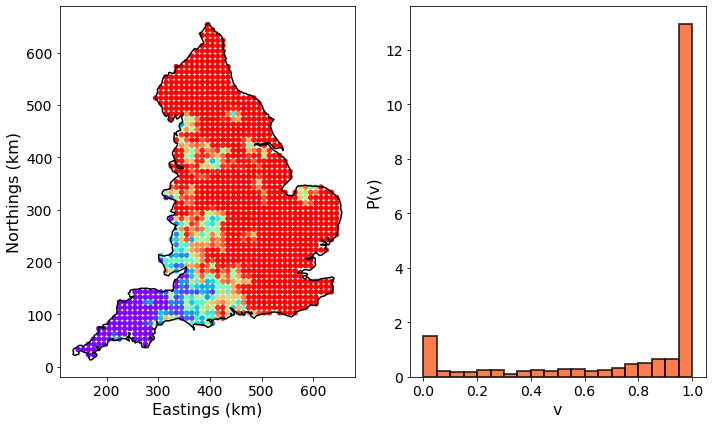

In [14]:
importlib.reload(util)
for k in range(0,100,10):
    T = test_args['sample_times'][k]
    print(k, 'T = ', T)
    states = neutral_states[k]
    util.distribution_map(states,XUK,XB)
    plt.show()

In [123]:
importlib.reload(sim)
test_args0 = copy.copy(args_list[0])
neutral_samples0, neutral_states0  = sim.sample_sequence(test_args0)

0 T =  1


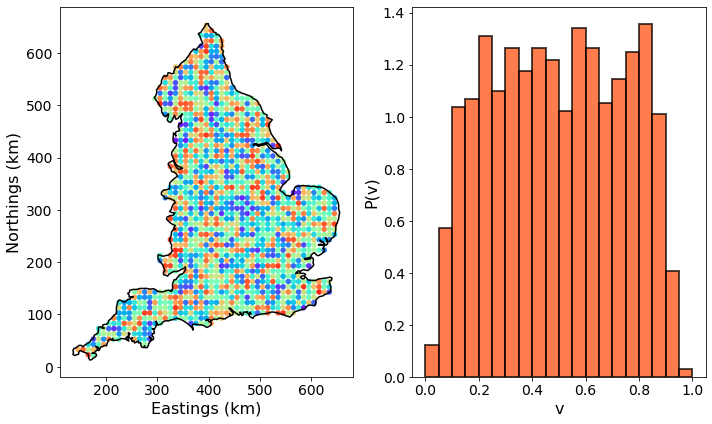

10 T =  643


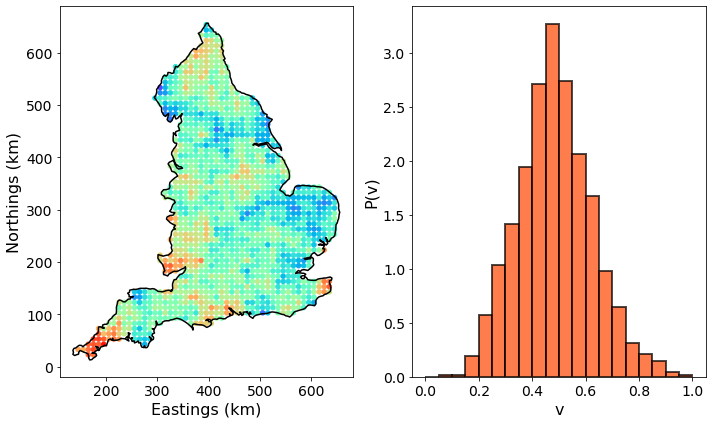

20 T =  1817


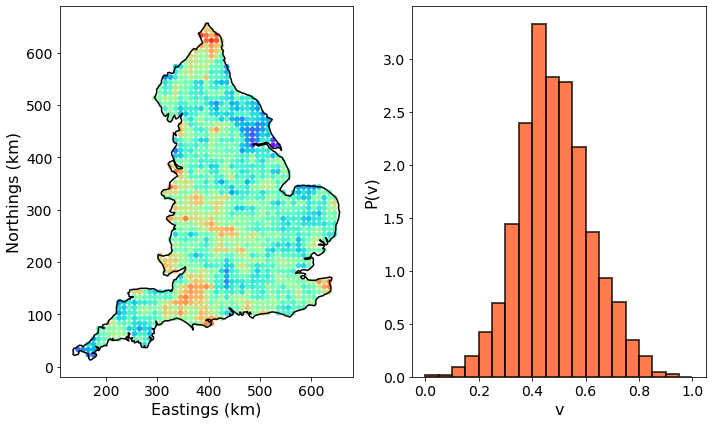

30 T =  3337


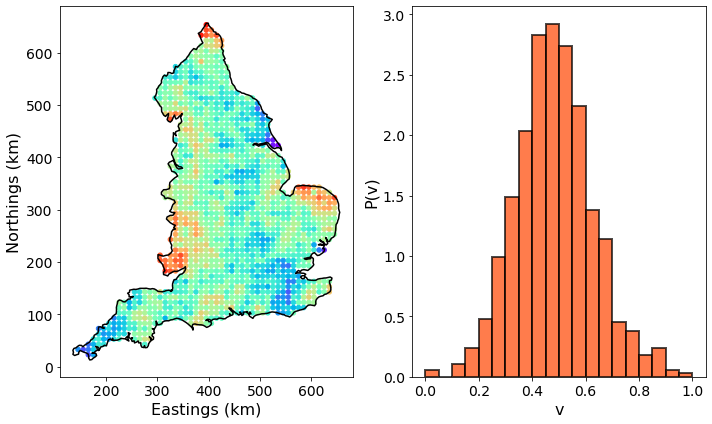

40 T =  5137


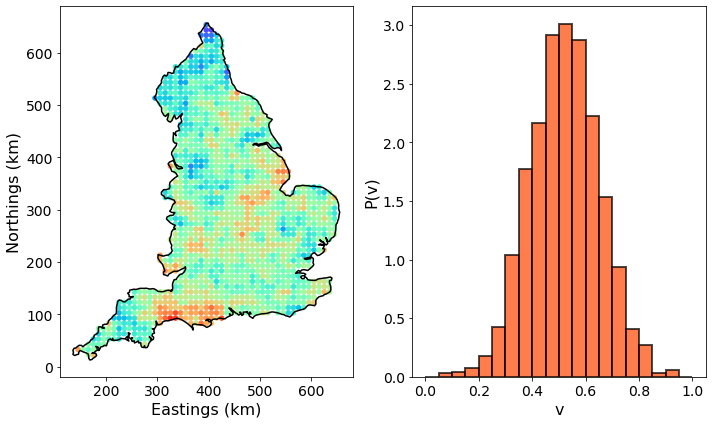

50 T =  7179


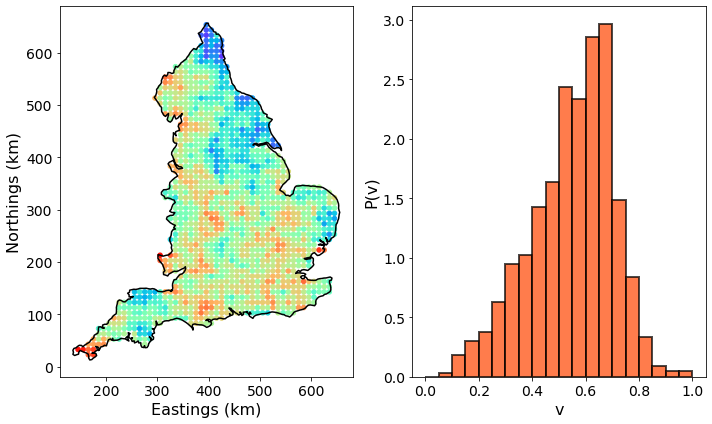

60 T =  9437


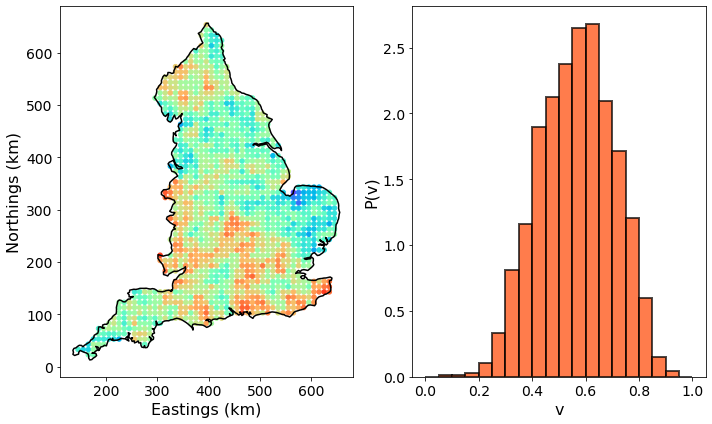

70 T =  11892


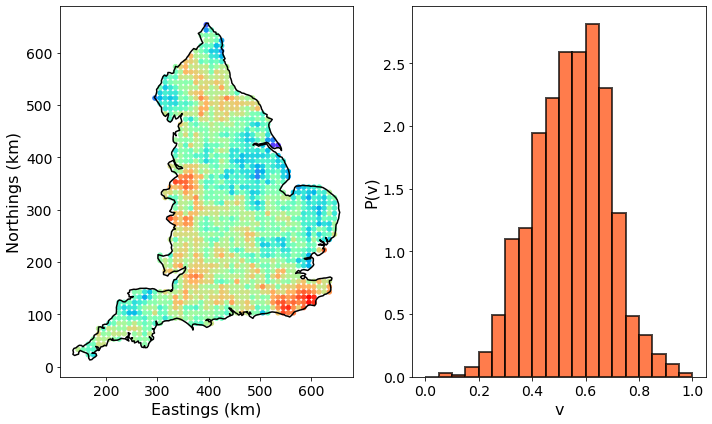

80 T =  14529


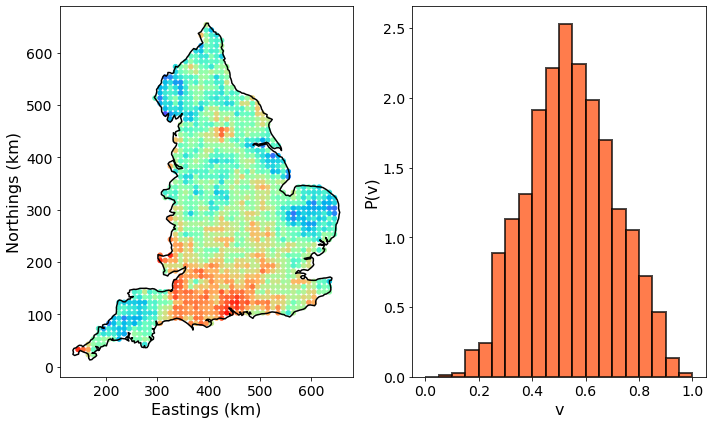

90 T =  17336


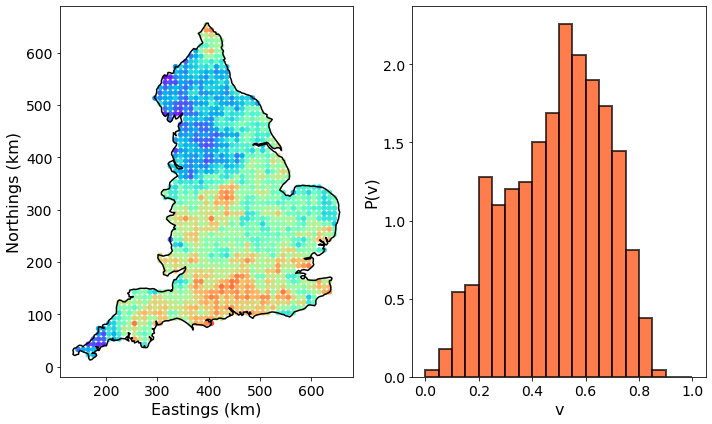

In [124]:
importlib.reload(util)
for k in range(0,100,10):
    T = test_args0['sample_times'][k]
    print(k, 'T = ', T)
    states = neutral_states0[k]
    util.distribution_map(states,XUK,XB)
    plt.show()

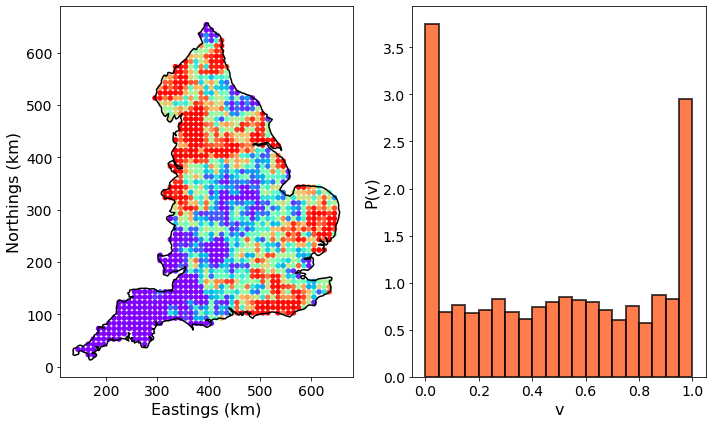

In [126]:
states = neutral_states[40]
util.distribution_map(states,XUK,XB)
plt.savefig(plots_folder/'Neutral_alpha_0.05_tau_2_N_5.pdf',dpi=400)
plt.show()


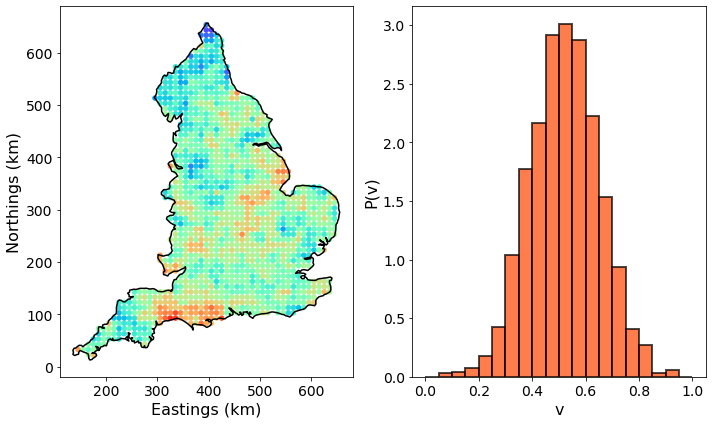

In [127]:
states = neutral_states0[40]
util.distribution_map(states,XUK,XB)
plt.savefig(plots_folder/'Neutral_alpha_0.05_tau_2_N_50.pdf',dpi=400)
plt.show()
